## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Download Dataset:** [Link](https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format)

## Methods

In [2]:
#load data
def load_data():
    df = pd.read_csv('D:/Data Sets/HandWrittenAlphabets/A_Z Handwritten Data.csv')
    return df

#desribe data
def describe_data(df):
    print("Shape:",df.shape)
    print("Columns:",df.columns)
    print('Unique Entities:',set(df['0']))

#plotting a sample
def show_sample(df):
    plt.imshow(df.sample(n=1).iloc[:,1:].values.reshape((28,28)),cmap='gray')
    plt.show()

In [3]:
df = load_data()
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
describe_data(df)

Shape: (372450, 785)
Columns: Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)
Unique Entities: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}


## Understanding the data

Target Variable: First column is the Target Column which has 26 uniquely encoded entities ==> [0-25] <br/>
Independent Variable: Rest 784 columns are the pixel values of each handwritten alphabet <br/>

In [5]:
#finding the no of samples each class has
no_of_sample={}
for i in range(len(df)):
    if df['0'][i] not in no_of_sample:
        no_of_sample.update({df['0'][i]:1})
    else:
        no_of_sample[df['0'][i]]+=1
no_of_sample

{0: 13869,
 1: 8668,
 2: 23409,
 3: 10134,
 4: 11440,
 5: 1163,
 6: 5762,
 7: 7218,
 8: 1120,
 9: 8493,
 10: 5603,
 11: 11586,
 12: 12336,
 13: 19010,
 14: 57825,
 15: 19341,
 16: 5812,
 17: 11566,
 18: 48419,
 19: 22495,
 20: 29008,
 21: 4182,
 22: 10784,
 23: 6272,
 24: 10859,
 25: 6076}

We see that the dataset is fucking imbalanced! So we will treat it accordingly!

In [6]:
min(no_of_sample.values())

1120

In [7]:
max(no_of_sample.values())

57825

In [8]:
#spc==sample per class
spc=min(no_of_sample.values())

## Plotting an Image

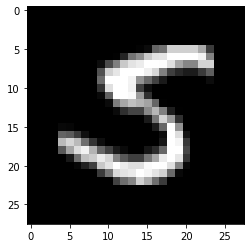

In [9]:
show_sample(df)

In [10]:
#adding the idx col to uniquely identify each row
df['idx']=[i for i in range(len(df))]
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,idx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


## Manual Cross Validation

In [11]:
from tqdm import tqdm

# keeping the test size to be 0.2
test_size = 0.2

#each sample in the test set will be round figure of 1120*0.2
test_sample_per_class = int(test_size*spc)
train_sample_per_class = spc-test_sample_per_class

train,test = [],[]
for i in tqdm(range(26)):
    train_sample=df[df['0']==i].sample(n=train_sample_per_class)
    train_sample_idx=list(train_sample.idx)
    
    train.append(train_sample.iloc[:,:-1])
    
    all_samples=df[df['0']==i]
    test.append(all_samples[~all_samples['idx'].isin(train_sample_idx)].iloc[:,:-1].sample(test_sample_per_class))

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:41<00:00,  1.60s/it]


In [12]:
len(train)

26

In [13]:
train[0]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
9748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
trainset,testset= train[0].values,test[0].values

for i in tqdm(range(1,26)):
    trainset=np.append(trainset,train[i].values,axis=0)
    testset=np.append(testset,test[i].values,axis=0)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:02<00:00, 11.76it/s]


In [15]:
trainset.shape

(23296, 785)

In [16]:
#shuffling the data to prevent bias
from sklearn.utils import shuffle
train=shuffle(trainset)
test=shuffle(testset)

In [17]:
x_train,y_train=train[:,1:],train[:,0]
x_test,y_test=test[:,1:],test[:,0]

In [18]:
y_train=y_train.astype('float64')
y_test=y_test.astype('float64')
x_train=x_train.astype('float64')
x_test=x_test.astype('float64')

In [19]:
y_train[1]

8.0

In [20]:
training=[(x_train[i],float(y_train[i])) for i in range(x_train.shape[0])]
testing=[(x_test[i],float(y_test[i])) for i in range(x_test.shape[0])]
'''
training=np.array(training,dtype=np.float64)
testing=np.array(testing,dtype=np.float64)

training=torch.from_numpy(training)
testing=torch.from_numpy(testing)'''

'\ntraining=np.array(training,dtype=np.float64)\ntesting=np.array(testing,dtype=np.float64)\n\ntraining=torch.from_numpy(training)\ntesting=torch.from_numpy(testing)'

In [21]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim

In [22]:
train_loader = DataLoader(training,batch_size=10,shuffle=True)
test_loader = DataLoader(testing,batch_size=10,shuffle=True)

In [23]:
train_loader

In [24]:
for data in train_loader:
    print(data[0].shape)
    print(data)
    break

torch.Size([10, 784])
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64), tensor([16., 10., 20., 11., 19., 14.,  2., 12.,  9., 17.], dtype=torch.float64)]


## Class Definition

In [25]:
## Training class
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear((28*28),128) #input layer (input1, output1)- input1 is 784=28*28 and 64 is output1 
        self.fc2=nn.Linear(128,128) #hidden layer (input2=output1,output2)
        self.fc3=nn.Linear(128,64) #hidden layer (input3=output2,output3)
        self.fc4=nn.Linear(64,32) 
        self.fc5=nn.Linear(32,32)
        self.fc6=nn.Linear(32,26) #output layer (input4=output3, output4)
        nn.Dropout(0.2)

    def forward(self,x):
        x=f.relu(self.fc1(x))
        x=f.relu(self.fc2(x))
        x=f.relu(self.fc3(x))
        x=f.relu(self.fc4(x))
        x=f.relu(self.fc5(x))
        x=self.fc6(x)
        return f.log_softmax(x,dim=1)

#object initialisation
net=Net() 
net

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=32, bias=True)
  (fc6): Linear(in_features=32, out_features=26, bias=True)
)

In [26]:
x=torch.rand((28,28))
x=x.view(-1,28*28)
print(x.shape)
out=net(x)
out

torch.Size([1, 784])


tensor([[-3.4340, -3.1079, -3.2964, -3.2946, -3.2440, -3.0450, -3.2749, -3.3768,
         -3.4004, -3.1658, -3.0624, -3.2044, -3.4608, -3.2818, -3.2783, -3.2119,
         -3.4686, -3.3214, -3.3109, -3.2433, -3.0655, -3.4098, -3.1704, -3.1694,
         -3.3449, -3.2496]], grad_fn=<LogSoftmaxBackward>)

In [31]:
x=training[0][0]
y=training[0][1]
print(y) 
x=x.reshape((1,784))
#type(x)
out=net(torch.from_numpy(x).float())
#print(out)
print(torch.from_numpy(np.array(y)))
loss=f.nll_loss(out,torch.from_numpy(np.array([y]).astype('int64')))
loss

25.0
tensor(25., dtype=torch.float64)


tensor(6.7036, grad_fn=<NllLossBackward>)

## Model Training

In [34]:
optimizer=optim.SGD(net.parameters(),lr=10**-3) #stagnant lr here; in most cases it is a decaying lr
epochs=5
loss_fn=nn.CrossEntropyLoss()

train_loss=[]
for epoch in tqdm(range(epochs)):
    for data in training:
        x,y=data
        #print(x.shape)
        x=x.reshape((1,784))
        #print(x.shape)
        net.zero_grad()
        output=net(torch.from_numpy(x).float())
        loss=loss_fn(output,torch.from_numpy(np.array([y]).astype('int64')))
        loss.backward()
        optimizer.step() #adjusting weights for us
    print('Loss:',loss)
    train_loss.append(loss.item())




  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


 20%|████████████████▊                                                                   | 1/5 [01:27<05:49, 87.43s/it]

Loss: tensor(0.0004, grad_fn=<NllLossBackward>)





 40%|█████████████████████████████████▌                                                  | 2/5 [02:56<04:23, 87.91s/it]

Loss: tensor(0.0004, grad_fn=<NllLossBackward>)





 60%|██████████████████████████████████████████████████▍                                 | 3/5 [04:26<02:56, 88.49s/it]

Loss: tensor(2.1100e-05, grad_fn=<NllLossBackward>)





 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [06:01<01:30, 90.57s/it]

Loss: tensor(9.6316e-05, grad_fn=<NllLossBackward>)





100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:32<00:00, 90.60s/it]

Loss: tensor(0.0003, grad_fn=<NllLossBackward>)


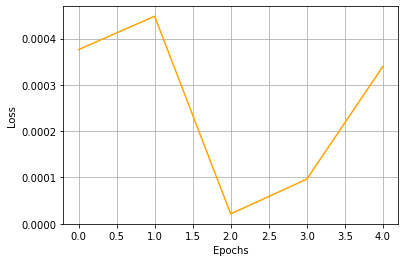

In [35]:
#plotting the loss vs epoch graph
plt.plot(train_loss,'orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

## Evaluating the train results

In [36]:
correct=0
total=0

with torch.no_grad():
    for data in tqdm(training):
        x,y=data
        x=x.reshape((1,784))
        y=np.array([y]).astype('int64')
        output=net(torch.from_numpy(x).float())
        for index,i in enumerate(output): #enumerate is used to add a counting value
            if torch.argmax(i)==y[index]:
                correct+=1
            total+=1
print('Accuracy:',round(correct/total,3)*100,'%') #rounding it to 3 decimal places.




  0%|                                                                                        | 0/23296 [00:00<?, ?it/s]


  0%|▎                                                                             | 98/23296 [00:00<00:24, 955.80it/s]


  1%|▋                                                                            | 199/23296 [00:00<00:24, 960.54it/s]


  1%|▉                                                                            | 283/23296 [00:00<00:25, 910.59it/s]


  2%|█▎                                                                           | 382/23296 [00:00<00:24, 922.35it/s]


  2%|█▌                                                                           | 458/23296 [00:00<00:26, 863.48it/s]


  2%|█▊                                                                           | 530/23296 [00:00<00:28, 805.86it/s]


  3%|██                                                                           | 611/23296 [00:00<00:28, 802.26it/s]


  3%|██▎             

Accuracy: 96.8 %


## Evaluating the test results

In [37]:
correct=0
total=0

with torch.no_grad():
    for data in tqdm(testing):
        x,y=data
        x=x.reshape((1,784))
        y=np.array([y]).astype('int64')
        output=net(torch.from_numpy(x).float())
        for index,i in enumerate(output): #enumerate is used to add a counting value
            if torch.argmax(i)==y[index]:
                correct+=1
            total+=1
print('Accuracy:',round(correct/total,3)*100,'%') #rounding it to 3 decimal places.




  0%|                                                                                         | 0/5824 [00:00<?, ?it/s]


  2%|█▍                                                                           | 113/5824 [00:00<00:05, 1115.75it/s]


  4%|███                                                                          | 228/5824 [00:00<00:05, 1113.18it/s]


  5%|████▏                                                                        | 312/5824 [00:00<00:05, 1009.95it/s]


  7%|█████▎                                                                        | 393/5824 [00:00<00:05, 936.07it/s]


  9%|██████▋                                                                       | 501/5824 [00:00<00:05, 966.05it/s]


 10%|███████▊                                                                      | 581/5824 [00:00<00:05, 882.85it/s]


 11%|████████▊                                                                     | 662/5824 [00:00<00:06, 856.75it/s]


 13%|██████████      

Accuracy: 92.4 %


In [38]:
torch.save(net.state_dict(), 'alphabet_recognition.model')